# Geochemistry

In this notebook we will go through dataset management using [pandas](https://pandas.pydata.org/docs/index.html) and plotting. Pandas makes handling tabular data in Python incredibly easy and, as it runs numpy in the background, the calculations are still fast. Most packages that rely on tabular data are built to work with pandas, so mastering is fundamental for performing data analysis in Python.

In [ ]:
%%capture
# Installing the pyrolite package
!pip install -q pyrolite | grep -v 'already satisfied'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.1/880.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 27.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
# For data processing
import pandas as pd
import numpy as np
from pyrolite.geochem.norm import all_reference_compositions,get_reference_composition

# For visualization
import seaborn as sns
import pyrolite.plot
import matplotlib.pyplot as plt


# Pandas in Python: A Powerful Data Analysis Tool

Pandas is a popular open-source data analysis and manipulation library for Python. It provides powerful data structures like DataFrame, which allows users to work with structured data seamlessly. One of Pandas' key strengths lies in its ability to read data from multiple formats, such as CSV, Excel, SQL databases, and more. This flexibility simplifies the process of importing and handling data, regardless of its source, making it a go-to choice for data scientists and analysts.

Reading Data from Multiple Formats

Pandas simplifies the data import process. For instance, to read a CSV file into a DataFrame, you can use the pd.read_csv('filename.csv') function. Similarly, Pandas supports pd.read_excel(), pd.read_sql(), and various other functions tailored to specific data formats. This versatility streamlines the data preprocessing phase, allowing analysts to focus on extracting insights rather than dealing with data intricacies.

Filtering Capabilities

Pandas excels at data filtering, enabling users to extract specific subsets of data efficiently. Through techniques like boolean indexing and query operations, users can filter data based on conditions. For instance, df[df['column_name'] > threshold] filters rows where the 'column_name' values exceed a defined threshold. This functionality allows users to explore and analyze specific segments of their data easily.

Applications in Geology

 Geologists often deal with extensive datasets containing information about rock compositions, mineral compositions, structural data, spectral data, stratigraphy, and more. Pandas' ability to handle large datasets and its filtering capabilities are invaluable in such scenarios. Geologists can use Pandas to filter seismic data based on specific time frames, analyze mineral compositions, or explore geological features based on various parameters. Furthermore, Pandas seamlessly integrates with visualization libraries like Matplotlib and Seaborn, enabling geologists to create insightful charts and plots for better data interpretation.

In summary, Pandas in Python offers a robust and versatile framework for data analysis and manipulation. By harnessing Pandas' capabilities, geologists can enhance their data-driven decision-making processes and gain deeper insights into geological phenomena.







To start let's load a geochemistry dataset. In pandas the datasets are stored as `pandas.DataFrame` objects if 2D or as `pandas.Series`objects if 1D (vector). One advantage of pandas for handling tabular data and data analysis compared to numpy is that we can access columns by their names instead of having to memorize indexes.

In an object-oriented framework such as Python, objects can have associated **methods** and **attributes**. This was already the case for numpy, but is also key in the pandas `DataFrame`and `Series` objects.

A **method** is like a function specific for an object. Once we have an object of a certain class instantiated (which just means we declared a variable of a certain class), we can call methods for that objects. We call a method by using `object.method()`notation. Sometimes methods take arguments, just like functions.

An **attribute** is a static property of the object. So instead of being called by placing parentheses after the name, we just use `object.attribute` to visualize the attributes.

As with anything, examples will make it clearer


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/refs/heads/main/Files/MH_geochem.csv",
                 index_col = 0)


This dataset contains volcanic rocks from the Mount Hunt area, close to Kalgoorlie (credit Nick Timms and Aaron Cavosie). We can use the `*.info()` method to investigate the columns (variables), data types of each column and how many null entries (no data) for each column.

In [ ]:
df.info()

Index(['index', 'sample_id', 'references', 'latitude', 'longitude',
       'tectonic_setting', 'rock_name', 'sio2', 'tio2', 'al2o3', 'cr2o3',
       'feot', 'nio', 'mno', 'mgo', 'cao', 'na2o', 'k2o', 'p2o5', 'loi', 'la',
       'ce', 'pr', 'nd', 'sm', 'eu', 'gd', 'tb', 'dy', 'ho', 'er', 'tm', 'yb',
       'lu', 'ba', 'li', 'th', 'ta', 'zr', 'u', 'pb', 'level1', 'level2',
       'level3'],
      dtype='object')

We can obtain slices of our DataFrame, but unlike numpy we can access items by a name. Say we want to isolate the column with SiO2 contents:

In [1]:
df["SiO2"]

NameError: name 'df' is not defined

If we want to rename variables in the dataframe we can use the `*.rename()` method. This method takes one mandatory argument, which is a `dict` object associating the names we want to change to the new names.

This can be done with a one-liner, for example:

`df = df.rename(dict(zip([e.lower() for e in pyrolite.geochem.REE()],pyrolite.geochem.REE())),axis=1)`

but we can also break it down into more manageable chunks. In this example we can see there is a variable called `Sr.1` (Sr measured with a different method). Let's rename it `Sr_alt`.

In [2]:
New_name = "Sr_alt"
Old_name = "Sr.1"

SyntaxError: invalid syntax (<ipython-input-2-96e33adde727>, line 1)

The next step is putting these two lists together in a dictionary. We can create the dictionary manually or use a one-two punch of `dict(zip(list1,list2))` if we had longer lists. the `zip()` function takes the two lists as arguments and creates a tuple* of the i$^{th}$ item of each list. The subsequent `dict()` call takes each of these tuples and transforms them into a key:value pair which will essentially tell python to transform the key into the value when we are renaming.

*A tuple is like a list, but its values are immutable

In [ ]:
Renamer = {Old_name : New_name} # we create a dictionary that maps the old name to the new name.
Renamer

{'la': 'La',
 'ce': 'Ce',
 'pr': 'Pr',
 'nd': 'Nd',
 'sm': 'Sm',
 'eu': 'Eu',
 'gd': 'Gd',
 'tb': 'Tb',
 'dy': 'Dy',
 'ho': 'Ho',
 'er': 'Er',
 'tm': 'Tm',
 'yb': 'Yb',
 'lu': 'Lu'}

Finally, we can use the `.rename()` method

In [ ]:
df = df.rename(Renamer,axis=1)
# axis=1 just means we are changing the names of columns
# If we wanted to change the names of rows it would be axis=0
df.columns

Index(['index', 'sample_id', 'references', 'latitude', 'longitude',
       'tectonic_setting', 'rock_name', 'sio2', 'tio2', 'al2o3', 'cr2o3',
       'feot', 'nio', 'mno', 'mgo', 'cao', 'na2o', 'k2o', 'p2o5', 'loi', 'La',
       'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb',
       'Lu', 'ba', 'li', 'th', 'ta', 'zr', 'u', 'pb', 'level1', 'level2',
       'level3'],
      dtype='object')

## Now we can start plotting our data
### Harker plots
$SiO_{2}$ vs. major elements

In [ ]:
fig, ax = plt.subplots()

ax.scatter(
    df["SiO2"], # x-variable
    df["Al2O3"], # y-variable
    marker="o",
    color="blue"
)

ax.set_xlabel("$SiO_{2}$ (wt%)")
ax.set_ylabel("$Al_{2}O_{3}$ (wt%)")

plt.show()

We can define a function that will take the element that we want to plot against $SiO_{2}$ and the ax in which to plot

In [ ]:
def Harker(df, element, ax, **kwargs):  #kwargs are the style changes that will be passed on to the ax.scatter() call

  x = df["SiO2"],
  y = df[element],

  ax.scatter(
      x,y,
      **kwargs
  )
  ax.set(xlabel="SiO2", ylabel=element)


fig, ax = plt.subplots()
Harker(df,"Al2O3",ax, color="red") # color is a kwarg

In [ ]:
# @title With fancy string formatting
def Harker_fancy(df, element, ax, **kwargs):  #kwargs are the style changes that will be passed on to the ax.scatter() call

  x = df["SiO2"],
  y = df[element],

  ax.scatter(
      x,y,
      **kwargs
  )
  xlabel = "$SiO_{2}$ (wt%)"
  ylabel = "$" + re.sub(r"(\d+)", r"_{\1}", element) + "$ (wt%)"
  ax.set(xlabel=xlabel, ylabel=ylabel)

Now we can plot all of the major elements in one go

In [ ]:
# We will use 8 major elements, which we will split up in 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(15, 6))


elements = ["Al2O3", "Fe2O3", "CaO", "MgO",
            "TiO2", "Na2O", "K2O", "P2O5"]

for ax, element in zip(axes.flatten(), elements):
  Harker_fancy(df, element, ax)

plt.tight_layout()

### Optional questions
- How can we use a different element as x-axis?
- Is there a way to make the x-label appear only on the lower plots?

In [ ]:
def Harker_fancy(df, element, ax, place_xlabel = True, **kwargs):  #kwargs are the style changes that will be passed on to the ax.scatter() call

  x = df["SiO2"],
  y = df[element],

  ax.scatter(
      x,y,
      **kwargs
  )

  ylabel = "$" + re.sub(r"(\d+)", r"_{\1}", element) + "$ (wt%)"
  if place_xlabel:
    xlabel = "$SiO_{2}$ (wt%)"
  else:
    xlabel = None

  ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6), sharex=True)


elements = ["Al2O3", "Fe2O3", "CaO", "MgO",
            "TiO2", "Na2O", "K2O", "P2O5"]

for i, (ax, element) in enumerate(zip(axes.flatten(), elements)):
  # Now we need to create a condition for deciding whether to place the label or not
  if i < np.floor(len(elements)/2): # If the plot is in the upper half we don't place the label
    Harker_fancy(df, element, ax, place_xlabel=False)
  else: # If the plot is in the lower half we place the label
    Harker_fancy(df, element, ax, place_xlabel=True)

plt.tight_layout()

## Calculating new variables:
With pandas we can not only visualize tabular data, but also filter, evaluate expressions, calculate new variables, etc.

For this example we will calculate Total Alkalis ($K_{2}O+Na_{2}O$) so we can later use this variable for classification in a TAS diagram.

We can achieve this in multiple ways


In [ ]:
#df["Na2O + K2O"] = df["Na2O"] + df["K2O"]
#df["Na2O + K2O"] = df.eval("Na2O + K2O")
df["Na2O + K2O"] = df.apply(lambda x: x["K2O"]+x["Na2O"], axis=1)
df["Na2O + K2O"].head()

In [ ]:
REE["La/Sm"] = REE.eval("La/Sm")
# using the .eval() method to calculate a new ratio
# REE["La/Sm"] = REE["La"].values/REE["Sm"].values would also work


REE["Nd/10"] = REE["Nd"].apply(lambda x: x/10)
# using the .apply method and an anonymous function to calculate a new variable
# REE["Nd/10"] = REE.eval("Nd/10") also works
# REE["Nd/10"] = REE["Nd"].values/10 also works


REE["Gd/Yb"] = REE.eval("Gd/Yb")

Now we can use the TAS template provided by `pyrolite`

In [ ]:
from pyrolite.plot.templates import TAS

In [ ]:
ax = TAS(linewidth = 0.5, add_labels = True)

ax.scatter(
    df["SiO2"],
    df["Na2O + K2O"]
)

plt.show()

`pyrolite` also provides an utility function to do automatic TAS classification

In [ ]:
from pyrolite.util.classification import TAS as TAS_clf

In [ ]:
cm = TAS_clf()

fig, ax = plt.subplots(1)
cm.add_to_axes(ax, alpha=0.5, linewidth=0.5, zorder=-1, add_labels=True)
df[["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, axlabels=False)
plt.show()

In [ ]:
### This is a technicality that is not strictly necessary

def remove_newlines(data):
    # Iterate through the dictionary keys and values
    for key, value in data.items():
        # Check if the value has a "name" key and if the name is a list
        if isinstance(value['name'], list):
            # Remove '\n' from each string in the list
            value['name'] = [name.replace('\n', ' ') for name in value['name']]
        elif isinstance(value['name'], str):
            # If it's a string (in cases like 'nan'), remove '\n' from the string
            value['name'] = value['name'].replace('\n', ' ')

remove_newlines(cm.fields)

In [ ]:
df["TAS"] = cm.predict(df)
df["Rocknames"] = df.TAS.apply(lambda x: cm.fields.get(x, {"name": None})["name"][0])
df["Rocknames"].sample(10)  # randomly check 10 sample rocknames

In [ ]:
fig, ax = plt.subplots(1)
cm.add_to_axes(ax, alpha=0.5, linewidth=0.5, zorder=-1, add_labels=True)
df[["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c=df["TAS"]) # Just set a random color for each unique code

defining our own legend and color scheme
`matplotlib` has a a long list of [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html), but you can also set colors as RGB values or HEX values. There is also a wide variety of [marker](https://matplotlib.org/stable/api/markers_api.html) types, as well as it being possible to create custom markers.

In [ ]:
# First let's check which lithologies are present
df["Rocknames"].value_counts()

In [ ]:
df["Rocknames"].unique()

In [ ]:
# We'll set colors for each lithology and distinct symbols for alkaline and sub-alkaline rocks
#
Colors = [
    "lightgreen",
    "forestgreen",
    "lightsalmon",
    "yellowgreen",
    "slategray",
    "orangered",
    "lightcoral",
    "orchid",
    "orange"
]

Markers = [
    "o", "o", "^", "o", "^", "o",
    "o", "^", "^"
]

Color_dict = dict(zip(df["Rocknames"].unique(),Colors))
Marker_dict = dict(zip(df["Rocknames"].unique(),Markers))

# Now we have a dictionary that associates each rock name to a unique symbol
Color_dict


## Filtering:
We can also use pandas to filter datasets quickly.
Remember the logic operators:
- equal to ==
- different to !=
- not ~
- smaller than <
- greater than >
- and &
- or |

In [ ]:
fig, ax = plt.subplots()

ax.grid(alpha=0.5)

# now we just need to loop over the rock names. Because the symbology is
# associated to the name we can use that to call the unique properties of
# each lithology using the dictionaries

for rock in df["Rocknames"].unique():
  ax.scatter(
      df.loc[df["Rocknames"]==rock,"SiO2"], #filtering the dataset
      df.loc[df["Rocknames"]==rock,"MgO"],
      color=Color_dict[rock],
      marker=Marker_dict[rock],
      s=75,
      label=rock
  )

ax.set_xlabel("$SiO_{2}$ (wt%)")
ax.set_ylabel("$MgO$ (wt%)")

ax.legend(title = "Rock name", frameon = True,
          loc = "upper right")



We can also use numerical filters and combine different filters using `&` (and), and `|` (or)

In [ ]:
df_filtered = df.loc[(df["MgO"] >= 8) & (df["La"] >= 20)]

We can also query data like SQL

In [ ]:
df.query("MgO >= 8")

filters can also include other operations

In [ ]:
# For columns with string entries we can check if the string
# contains a certain sub-string
df.loc[df["Rocknames"].str.contains("Alkaline")]

## Ternary plots

In [ ]:
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

In [ ]:
df["FeOt"] = df["Fe2O3"].values * 0.89998


fig,ax = plt.subplots()

for rock in df["Rocknames"].unique():
  df.loc[df["Rocknames"]==rock,["FeOt","Na2O + K2O","MgO"]].pyroplot.scatter(
      color=Color_dict[rock],
      marker=Marker_dict[rock],
      s=75,
      alpha=0.7,
      edgecolor="black",
      ax=ax
  )

fig.suptitle("AFM (Irvine and Baragar, 1973)")

plt.tight_layout()
plt.show()

## Spidergrams
`pyrolite` has an utility function to select REEs

In [ ]:
df.pyrochem.REE

In [ ]:
# We can use that command in line to plot them
# pyrolite also helps with normalization

df.pyrochem.REE.pyrochem.normalize_to("Chondrite_SM89").pyroplot.spider(alpha=0.3)

In [ ]:
fig, ax = plt.subplots()

for rock in df["Rocknames"].unique():
  df.loc[df["Rocknames"]==rock].pyrochem.REE.pyrochem.normalize_to("Chondrite_SM89").pyroplot.spider(
      ax=ax,
      color=Color_dict[rock],
      marker=Marker_dict[rock]
  )

ax.set_ylim(0.9,500)

In [ ]:
# We can adopt the same workflow for other incompatible elements
df["Ti"] = df[["TiO2"]].pyrochem.convert_chemistry(to=["Ti"]).values*1e4
df["P"] = df[["P2O5"]].pyrochem.convert_chemistry(to=["P"]).values*1e4
df["K"] = df[["K2O"]].pyrochem.convert_chemistry(to=["K"]).values*1e4



TraceElementList = [
    "Rb","Ba","Th","U","Nb","K","La","Ce","Pr",
    "Sr","P","Nd","Sm","Zr","Hf","Eu","Ti","Dy",
    "Y","Yb","Lu"
]

fig, ax = plt.subplots();

for rock in df["Rocknames"].unique():
  df.loc[df["Rocknames"]==rock,TraceElementList].pyrochem.normalize_to("NMORB_SM89").pyroplot.spider(
      ax=ax,
      color=Color_dict[rock],
      marker=Marker_dict[rock],
      unity_line=True
  );

ax.set_ylim(0.1,300);

We also have the option to color according to a continuous variable

In [ ]:
from matplotlib import colors, cm

ax = df.pyrochem.REE.pyrochem.normalize_to("Chondrite_SM89").pyroplot.spider(
    cmap='plasma_r',
    alpha=0.5,
    color=df["MgO"]
)

cmap = cm.plasma
norm = colors.Normalize(
    vmin=df["MgO"].min(),
    vmax=df["MgO"].max())

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="$MgO$ (wt%)")

# Isotopes
In this subsection we will learn how to calculate initial ratios, epsilon values and model ages.

We'll start by loading the dataset from [Mamani et al. (2010)](https://pubs.geoscienceworld.org/gsa/gsabulletin/article/122/1-2/162/125475/Geochemical-variations-in-igneous-rocks-of-the) with rock compositions from the Central Andes

In [ ]:
# first we will load some data
df = pd.read_excel(r"https://raw.githubusercontent.com/pierosampaio/PythonWorkshop/main/Files/Woerner_CentralAndes.xlsx",sheet_name="Table DR2")
df = df.rename({'Geologycal_age':'Stratigraphic Age'}) # For some reason in the original df it's written geologycal
df.head()

As we are interested in calculating initial ratios we will only select the samples that have age **AND** Nd isotopic data

In [ ]:
df = df.loc[(df['Age  (Ma)'].notnull())&(df["143_144Nd"]).notnull()]

We don't have $^{147}Sm/^{144}Nd$ data. However, we can estimate that using the following equation from Faure (1986):

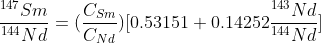

We can define a function that will be passed to every row with the `.apply()` method

In [ ]:
def estimate_147Sm(row):

  Sm = row["Sm_icpms"]
  Nd = row["Nd_icpms"]
  Nd143 = row["143_144Nd"]

  return (Sm/Nd)*(0.53151 + 0.14252*Nd143)

df["147Sm_144Nd"] = df.apply(estimate_147Sm, axis=1)

<ipython-input-28-dba58871f74f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["147Sm_144Nd"] = df.apply(estimate_147Sm, axis=1)


We can now use this new column as input for calculating the initial $^{143}Nd/^{144}Nd$ using the following equation:

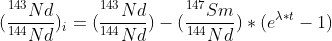

In [ ]:
def initial_Nd143(row):

    Nd143 = row["143_144Nd"]
    Sm147 = row["147Sm_144Nd"]
    lbd_Nd = 6.54e-12
    t = row["Age  (Ma)"]*1e6 # The ages were given as Ma

    Nd143_ini = Nd143 - Sm147*(np.exp(t*lbd_Nd)-1)

    return Nd143_ini

df["143Nd_144Nd_i"] = df.apply(initial_Nd143, axis=1)


<ipython-input-29-1c6419207bda>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["143Nd_144Nd_i"] = df.apply(initial_Nd143, axis=1)


With the initial Nd isotopic ratio we can calculate $ϵ_{Nd}$ and $T_{DM}$.

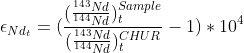

First let's define a helper function for back-calculating **CH**ondritic **U**niform **R**eservoir (CHUR) composition at the initial time for calculating $ϵ_{Nd}$:

In [ ]:
def Nd_CHUR(age):

    tt = age*1e6
    lbd_Nd = 6.54e-12 #Lugmair and Marti 1978
    mu_CHUR,a_CHUR = 0.1967, 0.512638 #Jacobsen and Wasserburg, 1980

    CHUR = a_CHUR - mu_CHUR*(np.exp(lbd_Nd*tt)-1)

    return np.round(CHUR,6)

def epsilon_Nd(row):

  t = row["Age  (Ma)"]
  lbd_Nd = 6.54e-12

  eps = ((row["143Nd_144Nd_i"]/Nd_CHUR(t)-1))*1e4
  return eps

df["eNd_i"] = df.apply(epsilon_Nd,axis=1)

<ipython-input-30-601c07d4a4df>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["eNd_i"] = df.apply(epsilon_Nd,axis=1)


<Axes: >

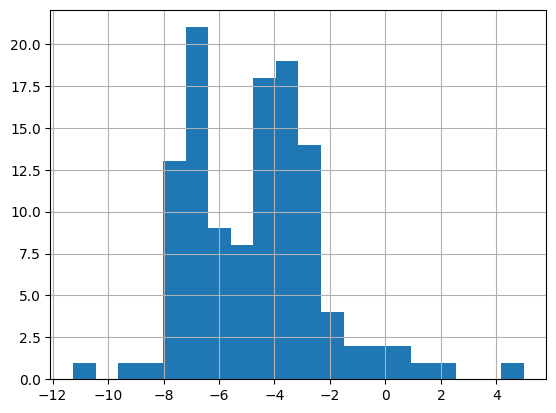

In [ ]:
df["eNd_i"].hist(bins=20)

For $T_{DM}$ calculation we can use the following equation (for single-stage Nd model age):

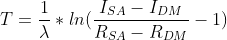

where I is the $^{143}Nd/^{144}Nd$ and R is the $^{147}Sm/^{144}Nd$


In [ ]:
def calculate_TDM(row):
  lbd_Nd = 6.54e-12
  R_DM,I_DM = 0.222, 0.513114 # Michard et al. 1985
  R_SA,I_SA = row["147Sm_144Nd"],row["143_144Nd"]

  T = (1/lbd_Nd)*np.log((I_SA - I_DM)/(R_SA - R_DM) + 1)

  return T/1e9

df["TDM (Ga)"] = df.apply(calculate_TDM,axis=1)

<ipython-input-33-accce3c3053f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.Rock_type.unique(),rotation=45)


[Text(0, 0, 'andesite'),
 Text(1, 0, 'dacite'),
 Text(2, 0, 'basaltic andesite'),
 Text(3, 0, 'trachyandesite'),
 Text(4, 0, 'rhyolite'),
 Text(5, 0, 'basalt'),
 Text(6, 0, 'monzonite'),
 Text(7, 0, 'granodiorite'),
 Text(8, 0, 'diorite')]

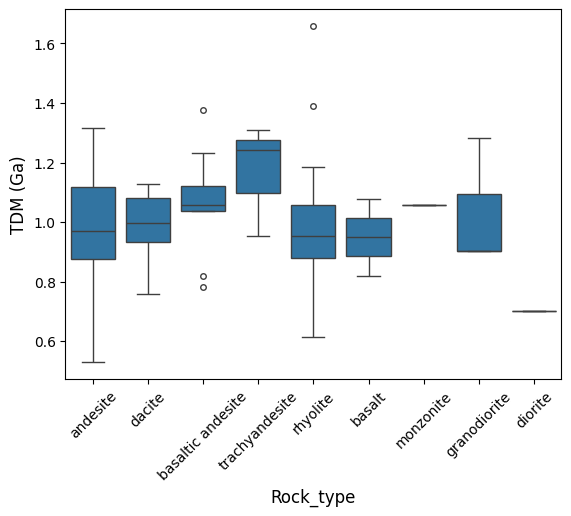

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(
    data=df,
    y="TDM (Ga)",
    x="Rock_type",
    ax=ax
)

ax.set_xticklabels(df.Rock_type.unique(),rotation=45)

<Axes: xlabel='TDM (Ga)', ylabel='Latitude (Y)'>

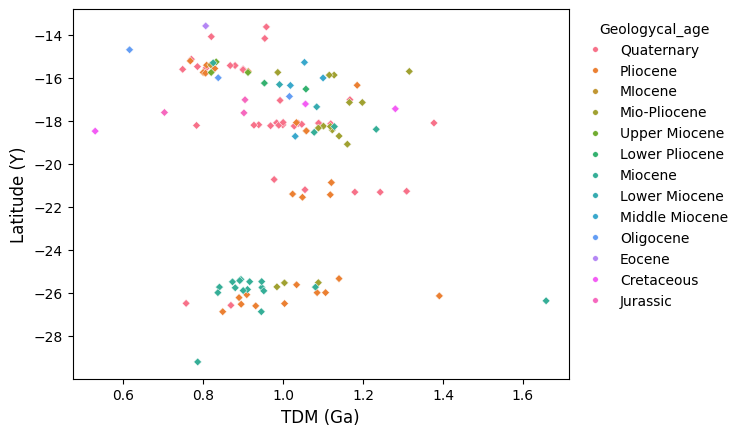

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    y="Latitude (Y)",
    x="TDM (Ga)",
    hue="Age",
    ax=ax
)